In [2]:
import numpy as np
import pandas as pd

In [3]:

all_data = []
for i in range(10,23):
    year = str(2000+i)
    url1 = 'https://home.treasury.gov/resource-center/data-chart-center/interest-rates/daily-treasury-rates.csv/'+year+'/all?type=daily_treasury_yield_curve&field_tdr_date_value='+year+'page&_format=csv'
    
    data = pd.read_csv(url1)
    all_data.append(data)
    pd_alldata = pd.concat(all_data,ignore_index=True)
    pd_alldata['Date'] = pd.to_datetime(pd_alldata['Date'])
    pd_alldata.index = pd_alldata['Date']
    
    req_cols = ['3 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', 
              '7 Yr','10 Yr', '20 Yr', '30 Yr']
final = pd_alldata[req_cols]


In [15]:
final

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,
2010-12-31,0.12,0.19,0.29,0.61,1.02,2.01,2.71,3.30,4.13,4.34
2010-12-30,0.12,0.20,0.29,0.66,1.07,2.06,2.76,3.38,4.21,4.43
2010-12-29,0.13,0.20,0.30,0.64,1.05,2.03,2.75,3.35,4.19,4.41
2010-12-28,0.15,0.21,0.31,0.75,1.17,2.18,2.89,3.50,4.33,4.53
2010-12-27,0.17,0.22,0.32,0.71,1.11,2.08,2.76,3.36,4.20,4.42
...,...,...,...,...,...,...,...,...,...,...
2022-01-07,0.10,0.24,0.43,0.87,1.17,1.50,1.69,1.76,2.15,2.11
2022-01-06,0.10,0.23,0.45,0.88,1.15,1.47,1.66,1.73,2.12,2.09
2022-01-05,0.09,0.22,0.41,0.83,1.10,1.43,1.62,1.71,2.12,2.09


In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, StandardScaler
import matplotlib.pyplot as plt

In [17]:
#Step1: We calculate the mean of the scaled data.
df_normalized_mean = pd.DataFrame(scale(final))
#Step2: Remove any missing data points
df_normalized_mean.dropna(inplace=True)
instruments = final.columns

In [18]:
instruments

Index(['3 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr', '10 Yr',
       '20 Yr', '30 Yr'],
      dtype='object')

In [19]:
df_normalized_mean

,0,1,2,3,4,5,6,7,8,9
0,-0.547480,-0.539046,-0.525439,-0.425702,-0.213533,0.512116,1.022237,1.426271,1.768109,1.786327
1,-0.547480,-0.529018,-0.525439,-0.373517,-0.157982,0.575489,1.089632,1.535529,1.871119,1.903665
2,-0.536823,-0.529018,-0.515577,-0.394391,-0.180202,0.537465,1.076153,1.494557,1.845366,1.877590
3,-0.515509,-0.518990,-0.505715,-0.279582,-0.046880,0.727585,1.264859,1.699415,2.025633,2.034041
4,-0.494196,-0.508962,-0.495854,-0.321331,-0.113541,0.600838,1.089632,1.508214,1.858243,1.890628
...,...,...,...,...,...,...,...,...,...,...
3248,-0.568793,-0.488905,-0.387374,-0.154336,-0.046880,-0.134292,-0.352617,-0.676933,-0.781378,-1.121063
3249,-0.568793,-0.498933,-0.367650,-0.143899,-0.069100,-0.172316,-0.393053,-0.717904,-0.820006,-1.147138
3250,-0.579450,-0.508962,-0.407097,-0.196085,-0.124651,-0.223015,-0.446969,-0.745219,-0.820006,-1.147138
3251,-0.590107,-0.508962,-0.436683,-0.258708,-0.213533,-0.299063,-0.514364,-0.813504,-0.845759,-1.173214


In [20]:
#Step3: We calculate the PCA using fit_transform
pca = PCA(n_components=3)
YC_PCA = pca.fit_transform(df_normalized_mean)

In [21]:
YC_PCA.shape

(3252, 3)

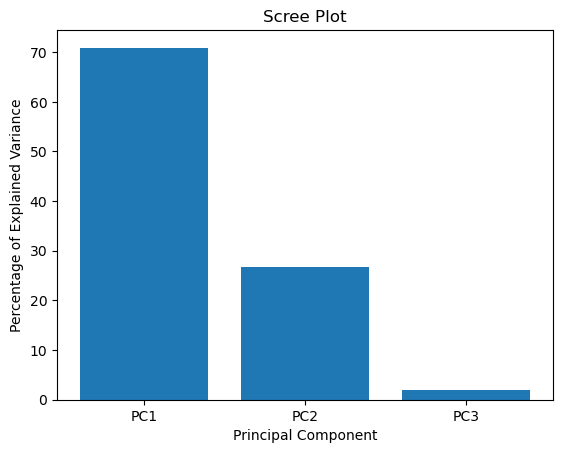

In [22]:
#Step4: Create a SCREE plot to check the weights of each component
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot');

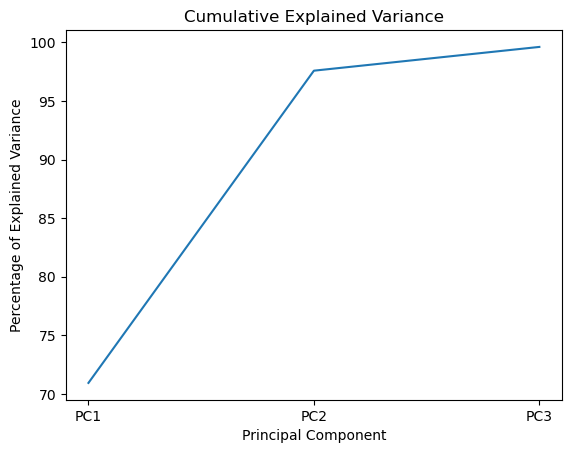

In [23]:
#Here we look at the cumulative variance explained
plt.plot(labels, pca.explained_variance_ratio_.cumsum()*100)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Cumulative Explained Variance');


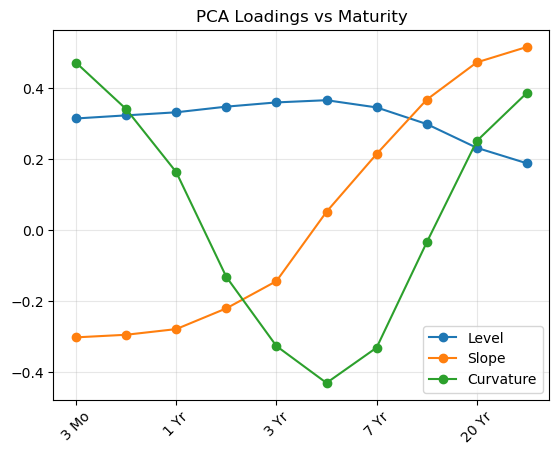

In [24]:
pd.DataFrame(pca.components_.T, index=instruments,
             columns=['Level','Slope','Curvature']).plot(marker='o', title='PCA Loadings vs Maturity')
plt.xticks(rotation=45); plt.grid(alpha=0.3); plt.show()

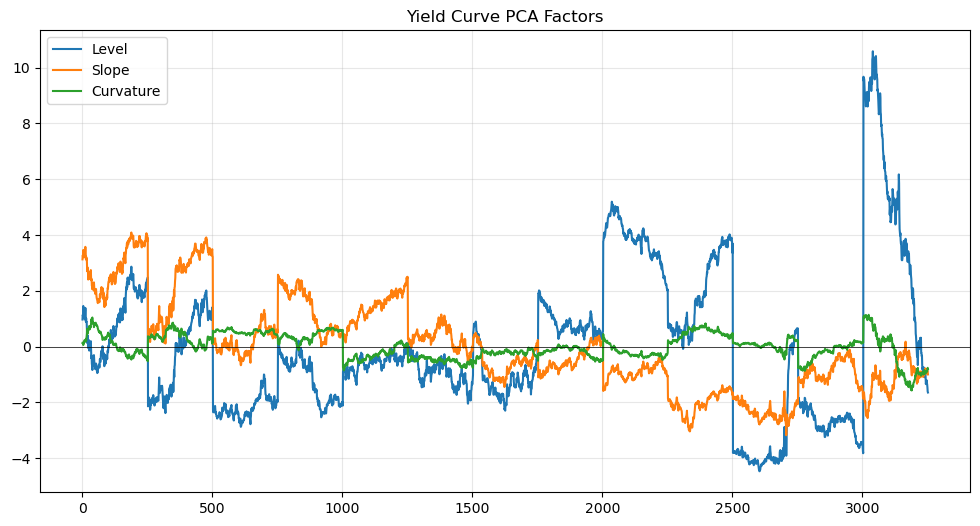

In [25]:
dates = df_normalized_mean.index
scores = pd.DataFrame(YC_PCA, index=dates, columns=['Level', 'Slope', 'Curvature'])

scores.plot(figsize=(12,6), title="Yield Curve PCA Factors")
plt.axhline(0, color='k', linewidth=0.5)
plt.grid(alpha=0.3)
plt.show()

In [ ]:
# 3. Affichage - 5 graphiques de 200 points pour voir le déplacement dans le temps
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Diviser les données en 5 segments de 200 points
n_points = 200
points_total = min(1000, len(YC_PCA))
n_segments = min(5, points_total // n_points)

for i in range(n_segments):
    start_idx = i * n_points
    end_idx = start_idx + n_points
    
    ax = axes[i]
    ax.scatter(YC_PCA[start_idx:end_idx, 0], YC_PCA[start_idx:end_idx, 1], alpha=0.6)
    ax.set_xlabel('PC1 (Niveau global)')
    ax.set_ylabel('PC2 (Courbure)')
    ax.set_title(f'Période {i+1} ({start_idx}-{end_idx})')
    ax.grid(alpha=0.3)

# Masquer le dernier subplot si on ne l'utilise pas
if n_segments < len(axes):
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

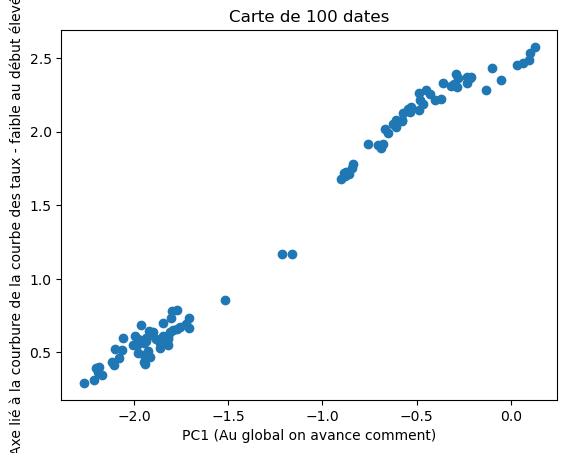

In [29]:
# 3. Affichage
plt.scatter(YC_PCA[700:800, 0], YC_PCA[700:800, 1])
#for i in range(10):
#    plt.annotate(f'Banane {i+1}', (YC_PCA[700+i, 0], YC_PCA[700+i, 1]))
    
plt.xlabel('PC1 (Au global on avance comment)')
plt.ylabel('PC2 (Axe lié à la courbure de la courbe des taux - faible au début élevé à la fin)')
plt.title('Carte de 100 dates')
plt.show()

In [34]:
YC_PCA[:,0]

array([ 0.96990814,  1.13675998,  1.08632565, ..., -1.46307531,
       -1.61271783, -1.64585079], shape=(3252,))